In [1]:
import pandas as pd
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
import warnings
import os
import random

Reading our DaTa

In [3]:
random.seed(42)
plt.rcParams.update({'font.size': 25})
sns.set_theme(color_codes=True)
warnings.filterwarnings('ignore')

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

train_df = pd.read_csv("C:/Users/dawou/OneDrive/Bureau/ML/ChuteDetc/Train.csv")
'''C:/Users/Lina/Desktop/Machine Learning/Train.csv'''
test_df = pd.read_csv('C:/Users/dawou/OneDrive/Bureau/ML/ChuteDetc/Test.csv')
'''C:/Users/Lina/Desktop/Machine Learning/Test.csv'''
train_df.drop(['Unnamed: 0'], axis = 1, inplace = True)
test_df.drop(['Unnamed: 0'], axis = 1, inplace = True)

X_train = train_df.drop(['fall','label'],axis=1)
y_train = train_df['fall']
X_test =  test_df.drop(['fall','label'],axis=1)
y_test =  test_df['fall']
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y, discrete_features=False)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores
mi_scores = make_mi_scores(X_train, y_train)

la premiére visualtisation

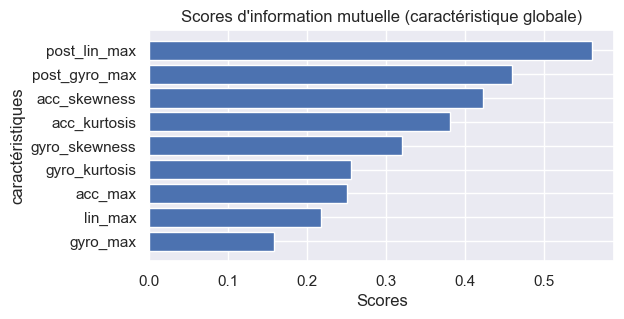

In [4]:
def plot_utility_scores(scores):
    y = scores.sort_values(ascending=True)
    width = np.arange(len(y))
    ticks = list(y.index)
    plt.barh(width, y)
    plt.yticks(width, ticks)
    plt.title("Scores d'information mutuelle (caractéristique globale)")
plt.figure(dpi=100, figsize=(6, 3))
plt.xlabel("Scores")
plt.ylabel("caractéristiques")
plot_utility_scores(mi_scores)
plt.show()

#2éme visualisation

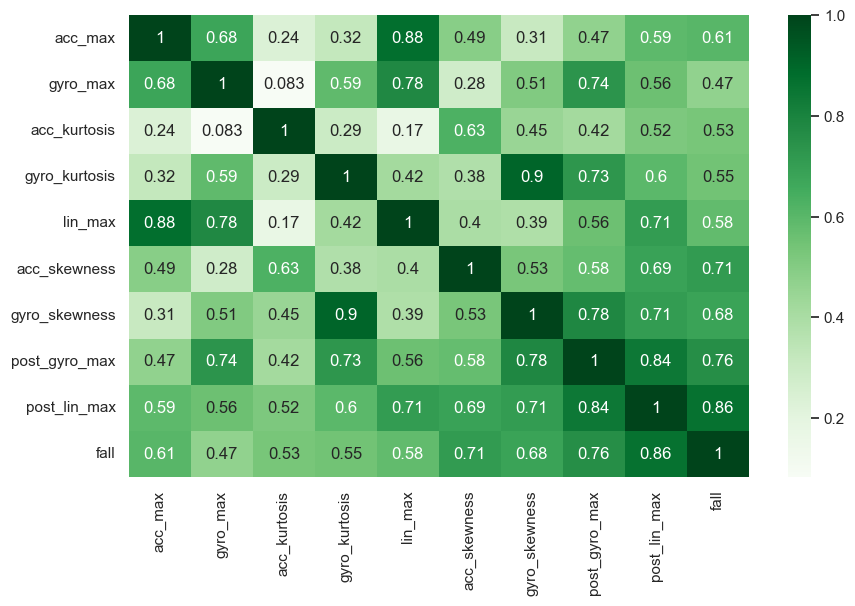

In [5]:
y_train=train_df.drop(['label'],axis=1)
fig, ax = plt.subplots(figsize=(10, 6))
sns.heatmap(y_train.corr(), ax=ax,  cmap="Greens", annot=True)
plt.show()

#3éme visualisation

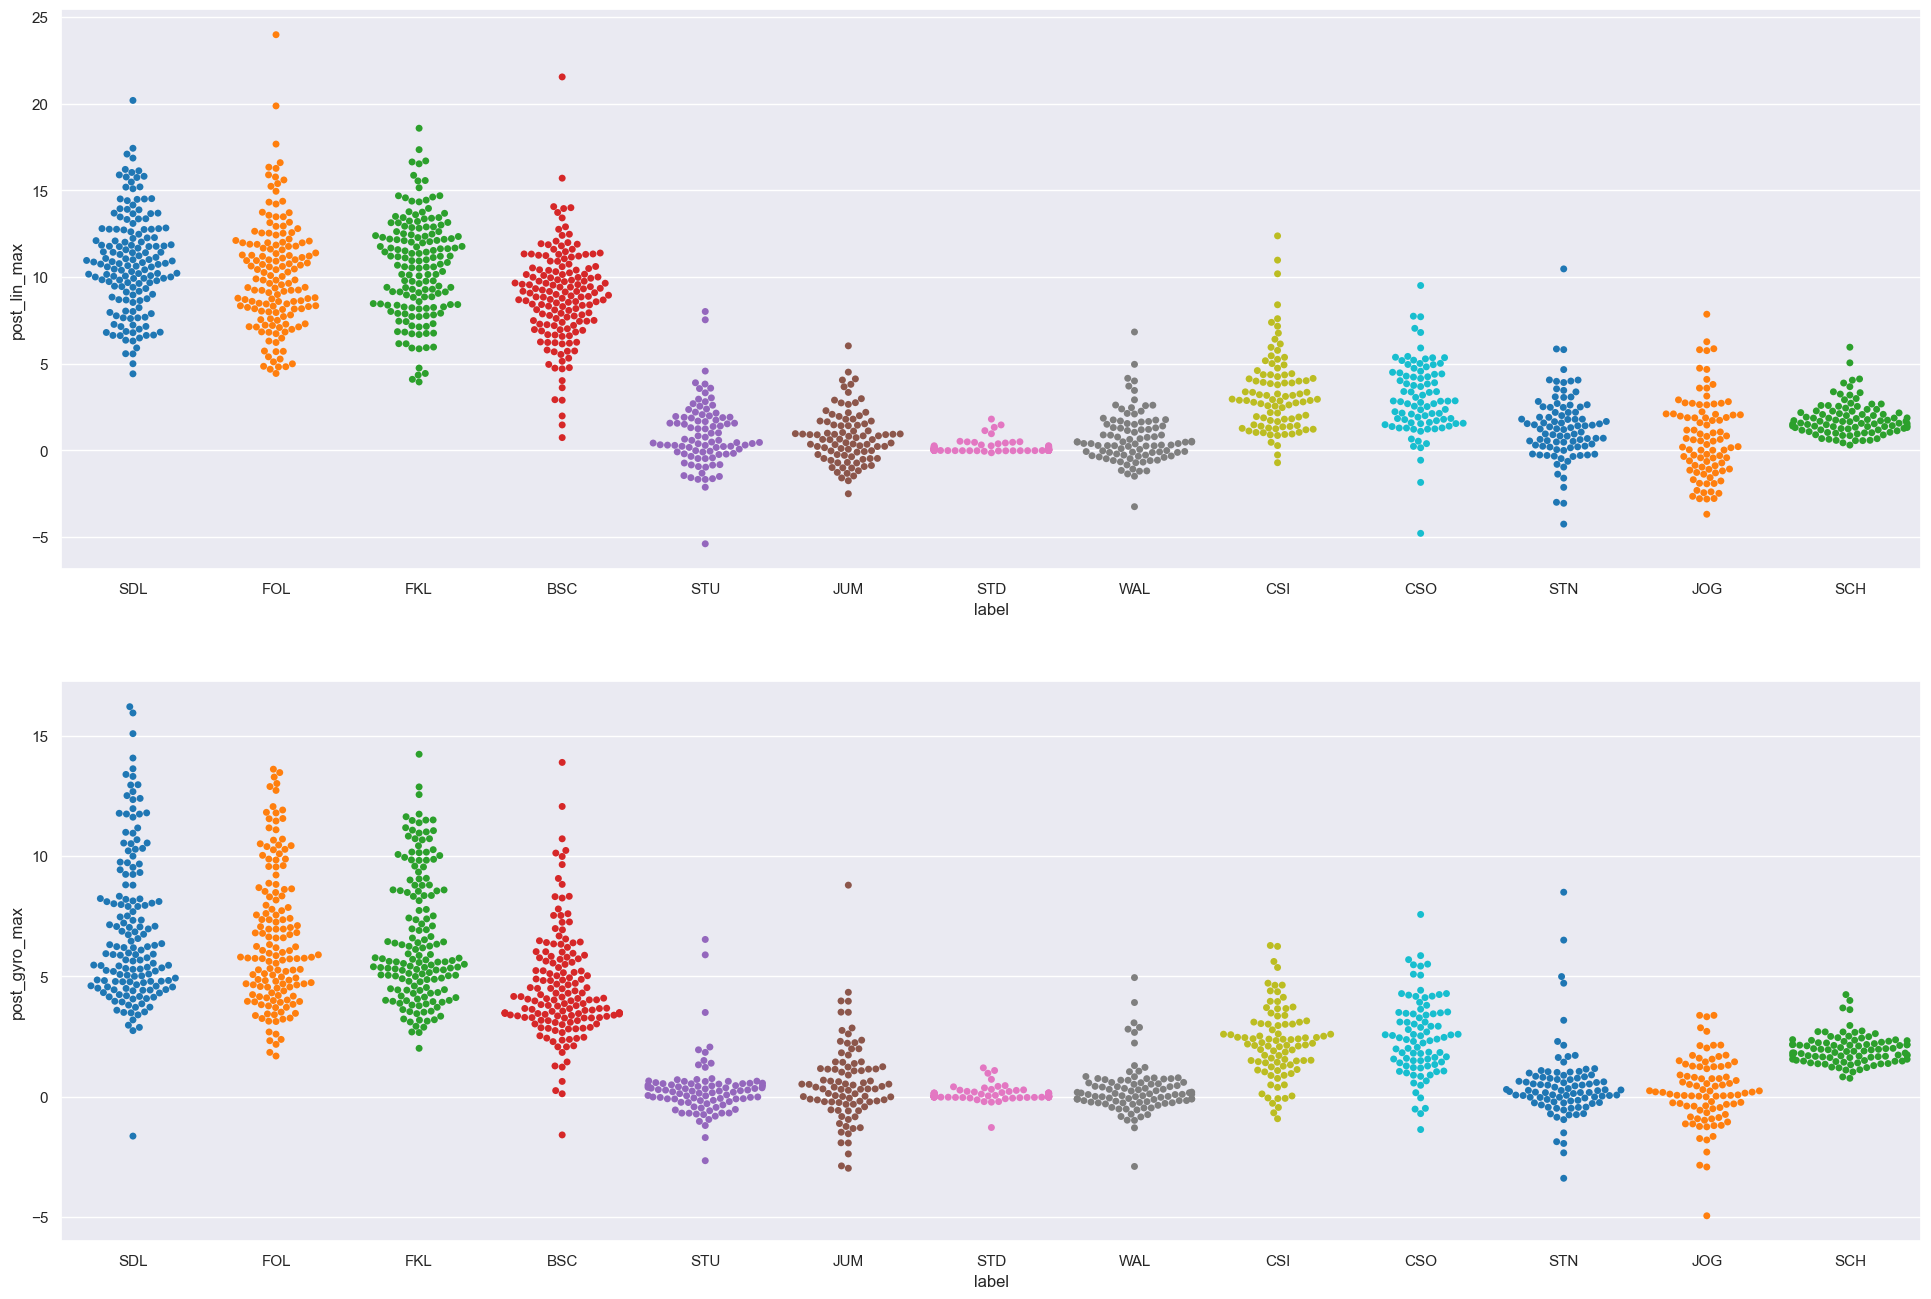

In [6]:
Xx_train = X_train
Xx_test = X_test
Xx_train.drop(['gyro_max'], axis=1, inplace=True)
Xx_test.drop(['gyro_max'], axis=1, inplace=True)
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b", "#e377c2", "#7f7f7f", "#bcbd22", "#17becf"]
figure, ax = plt.subplots(2, figsize=(24, 16))

sns.swarmplot(x = train_df.label,y = train_df.post_lin_max, ax = ax[0], palette=colors)
sns.swarmplot(x = train_df.label,y = train_df.post_gyro_max, ax = ax[1], palette=colors)
plt.show()